# Digital Filter Design Illustration

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, butter, lfilter

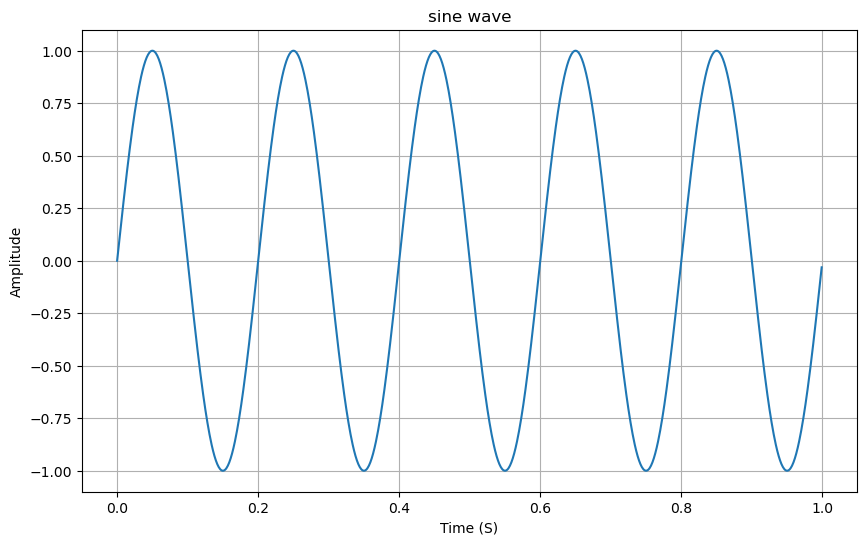

In [2]:
# Generating a signal
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
f = 5  # 5 Hz frequency
A = 1
x = A * np.sin(2 * np.pi * f * t)

# Plotting singal x
plt.figure(figsize=(10, 6))
plt.plot(t, x)
plt.title("sine wave")
plt.xlabel("Time (S)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

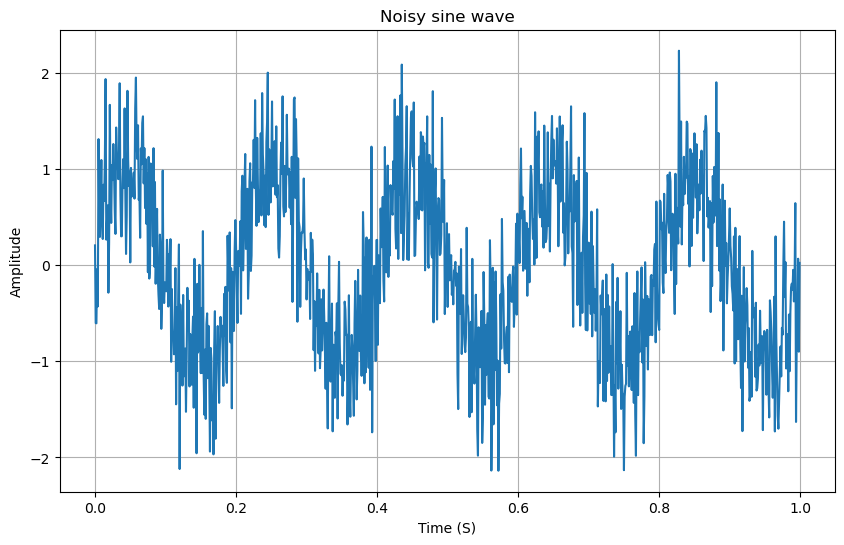

In [10]:
# Adding white noise 
A_n = 0.5 # Noise amplitude
noise = A_n * np.random.normal(size=fs)
noisy_x = x + noise # Additive noise

# Plotting noisy signal x
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_x)
plt.title("Noisy sine wave")
plt.xlabel("Time (S)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

### FIR filter
- *Filter order M = 61*
- *Normalised cutoff frequency 0.1*
- *Hamming window method*

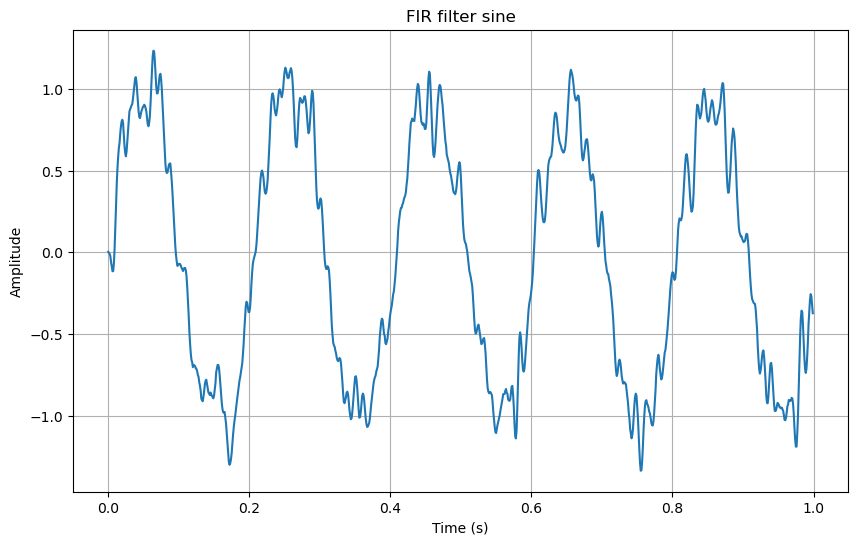

In [11]:
M = 13 # Filter order or filter taps
fc = 0.01 # normalized cutoff frequency
a_fir = 1.0 # Filter a coefficients
b_fir = firwin(M, fc, window='hamming') # Filter b coefficients

# Applying the filter to the noisy signal
x_fir = lfilter(b_fir, a_fir, noisy_x)

# Plotting filtered x
plt.figure(figsize=(10, 6))
plt.plot(t, x_fir)
plt.title('FIR filter sine')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [5]:
print(b_fir)

[0.00679069 0.01516873 0.03947091 0.07798288 0.1211849  0.15528388
 0.16823602 0.15528388 0.1211849  0.07798288 0.03947091 0.01516873
 0.00679069]


### IIR Filter
- *Filter order N = 4*
- *Normalized cutoff frequency 0.1*
- *Analog mapping from Butterworth LPF*

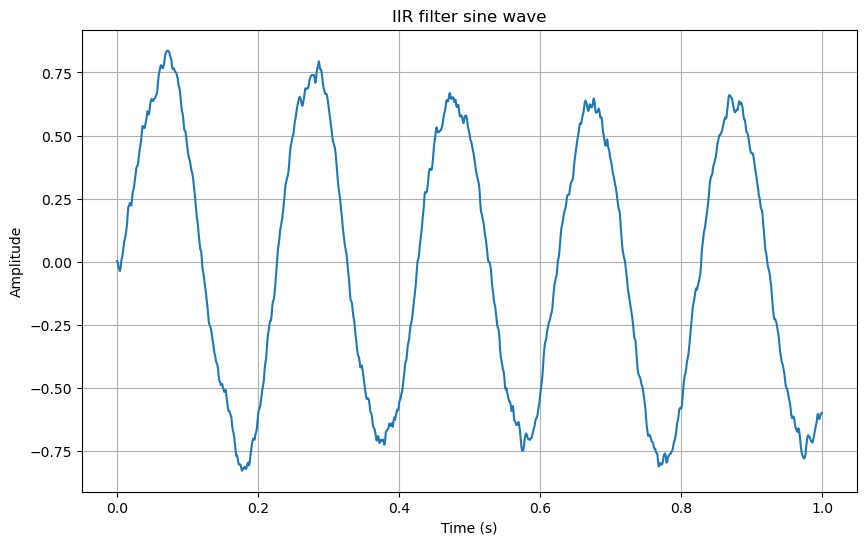

In [14]:
N = 1 # Filter order
# Filter alpha and beta coefficients
b_iir, a_iir = butter(N, fc, btype='low')

# Apply the filter to the noisy signal
x_iir = lfilter(b_iir, a_iir, noisy_x)

# Plotting IIR filtered sine wave
plt.figure(figsize=(10, 6))
plt.plot(t, x_iir)
plt.title('IIR filter sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()